# External modules

Last unit we visualized Bobs data. Now we have to analyze them a little bit, afterwards we will talk about simulation, before we work with real data.

So let us first take a look at the data again:

In [ ]:
import csv
import pathlib
import matplotlib.pyplot

def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number = str(csv_file.stem).split("_")
        day = int(day)
        dish_number = int(dish_number)
        cell_counter = 0
        cell_area_counter = 0
        reader = csv.DictReader(csv_file_handle)
        for row in reader:
            cell_counter += 1
            cell_area_counter += int(row[" Cell Area"])
        if dish_number not in dishes.keys():
            dishes[dish_number] = {}
        dishes[dish_number][day] = {
            "cell_count": cell_counter,
            "area": cell_area_counter
        } 
    return

csv_files = list()
data_folder = pathlib.Path("./data")
for csv_file in data_folder.iterdir():
    if "dish_" in csv_file.stem:
        csv_files.append(csv_file)


dishes = {}
for csv_file in csv_files:
    process_csv(csv_file, dishes)

area = []
count = []
cells = {"area": area, "count": count}
# We know that the dishes are numbered so we iterate over them<
for dish_number in range(1, len(dishes) + 1, 1):
    dish = dishes[dish_number]
    dish_area = []
    dish_count = []
    # We know that the days in the dishes are numbered
    for day_number in range(1, len(dish) + 1, 1):
        value_pair = dish[day_number]
        day_area = value_pair["area"]
        day_count = value_pair["cell_count"]
        dish_area.append(day_area)
        dish_count.append(day_count)
    area.append(dish_area)
    count.append(dish_count)

figure, axes = matplotlib.pyplot.subplots(2,1)
days = [day for day in range(0, len(cells["count"][0]), 1)]
for dish in range(0, len(cells["count"])):  
    axes[0].plot(days, cells["count"][dish], label=f"Dish {dish}")
    axes[1].plot(days, cells["area"][dish], label=f"Dish {dish}")
figure.suptitle("Cell growth")
axes[0].set_title("Cell count")
axes[0].set_xlabel("Days")
axes[0].set_ylabel("Number of cells")
axes[1].set_title("Cell area")
axes[1].set_xlabel("Days")
axes[1].set_ylabel("Area covered by cells")
axes[0].legend()
axes[1].legend()
matplotlib.pyplot.show()

## Numerical differentiation

After we have seen our two plots, it seems prudent to look at the growth rates now.
As you may recall from your math studies the growth of the cells is the change in the number of cells or the first derivative of the numbers you see in front of you.
Since we lack the underlying function, we have to solve this problem numerically,
which means letting a computer handle it by a number-by-number basis.
So how do we do this?

During my high-school time the derivative was introduced via the [slope](https://en.wikipedia.org/wiki/Slope) of a function.
We counted how much we went up or down on one axis comparted to the other,
as shown in the following [illustration from Wikipedia](https://commons.wikimedia.org/wiki/File:Wiki_slope_in_2d.svg):

![A slope illustrated with the interval steps on the x- and y-axis](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Wiki_slope_in_2d.svg/445px-Wiki_slope_in_2d.svg.png)

Luckily, for us [numerical differentiation](https://en.wikipedia.org/wiki/Numerical_differentiation) did not progress much further, so we get the first derivative with the the original formula:

$$
m = \frac{y_{2} - y_{1}}{x_{2} - x_{1}}
$$

So we can get the forward slope, an approximation for the first order derivative by looking .

We can get the forward slope, an approximation for the derivative by looking a certain distance ahead.
In our case, the sample times indicate the length of this distance often called h.
Our formula now takes the following form:

$$
f^{'}(x) = \frac{f(x + h) - f(x)}{h}
$$

If you need a symmetric derivative, you may choose to look around the point of interest and use:

$$
f^{'}(x) = \frac{f(x + h) - f(x - h)}{2 h}
$$

Should you need to calculate derivatives of mathematical functions you should look up [Taylor expansion](https://en.wikipedia.org/wiki/Taylor_series) and [finite difference coefficients](https://en.wikipedia.org/wiki/Finite_difference_coefficient).
In this case you should also pay attention to the size of h.
You can also reverse the process and numerically integrate, but there are special lectures for this topic that will warn you about the pitfalls in the different techniques.

To round up this topic I would ask you to calculate the derivatives of the cell growth and plot them. Please use the cell below.

In [ ]:
# Write your code here
# Feel free to copy from above what you need

<details>
<summary> Show suggested solution </summary>

```Python
import csv
import pathlib
import matplotlib.pyplot

def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number = str(csv_file.stem).split("_")
        day = int(day)
        dish_number = int(dish_number)
        cell_counter = 0
        cell_area_counter = 0
        reader = csv.DictReader(csv_file_handle)
        for row in reader:
            cell_counter += 1
            cell_area_counter += int(row[" Cell Area"])
        if dish_number not in dishes.keys():
            dishes[dish_number] = {}
        dishes[dish_number][day] = {
            "cell_count": cell_counter,
            "area": cell_area_counter
        } 
    return

csv_files = list()
data_folder = pathlib.Path("./data")
for csv_file in data_folder.iterdir():
    if "dish_" in csv_file.stem:
        csv_files.append(csv_file)


dishes = {}
for csv_file in csv_files:
    process_csv(csv_file, dishes)

area = []
count = []
cells = {"area": area, "count": count}
# We know that the dishes are numbered so we iterate over them<
for dish_number in range(1, len(dishes) + 1, 1):
    dish = dishes[dish_number]
    dish_area = []
    dish_count = []
    # We know that the days in the dishes are numbered
    for day_number in range(1, len(dish) + 1, 1):
        value_pair = dish[day_number]
        day_area = value_pair["area"]
        day_count = value_pair["cell_count"]
        dish_area.append(day_area)
        dish_count.append(day_count)
    area.append(dish_area)
    count.append(dish_count)

def get_forward_derivative(series_x, series_y):
    """ Gets the forward derivative

    We chose the forward derivative, because it needs fewer values and still gives us some insight.
    We can also calculate it for the first element in the series, which lacks a predecessor
    """
    if len(series_x) != len(series_y):
        raise ValueError(f"{series_x} did not have the same number of elements as {series_y}")
    return_x = list()
    return_y = list()
    # Remeber that the last element has no sucessor and we can therefore not get a derivative for it
    for index in range(0, len(series_x) - 1, 1):
        delta_x = series_x[index + 1] - series_x[index]
        delta_y = series_y[index + 1] - series_y[index]
        slope = delta_y / delta_x
        return_x.append(series_x[index])
        return_y.append(slope)
    return return_x, return_y
    

figure, axes = matplotlib.pyplot.subplots(2,1)
days = [day for day in range(0, len(cells["count"][0]), 1)]
for dish in range(0, len(cells["count"])):
    # * unpacks the returned tuple into two values
    axes[0].plot(*get_forward_derivative(days, cells["count"][dish]), label=f"Dish {dish}")
    axes[1].plot(*get_forward_derivative(days, cells["area"][dish]), label=f"Dish {dish}")
figure.suptitle("Cell growth")
axes[0].set_title("Cell count")
axes[0].set_xlabel("Days")
axes[0].set_ylabel("Change in the number of cells")
axes[1].set_title("Cell area")
axes[1].set_xlabel("Days")
axes[1].set_ylabel("Change in the area covered by cells")
axes[0].legend()
axes[1].legend()
matplotlib.pyplot.show()
```

</details>

## Histogram

Now we want to find the correct way to describe the growth of our cells. 
While we could do this for every dish, it would be preferable to it for all of them together so we learn more about or cells in general.
The first question we should answer is: “Are our cells comparable among each other?”
In this case, we may wish to know how they compare in size to each other.
We want to compare the cell sizes for each day and dish.
Before we start throwing math at the problem, we should first look at one sample.
The usual tool to visualize one-dimensional distributions is the histogram.
It sorts numbers into bins or **lists**. 
So there is a **list** of 0 - 20 pixels of area an all the cells with this area go into this **list**.
We then plot all the **lists** next to each other.
Here is a code snippet to create a histogram the cell_area for dish 1 at day 5:

```Python
import csv
import pathlib
import matplotlib.pyplot

def get_cell_areas(csv_file, cell_areas):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number = str(csv_file.stem).split("_")
        day = int(day)
        dish_number = int(dish_number)
        reader = csv.DictReader(csv_file_handle)
        areas = list()
        for row in reader:
            areas.append(int(row[" Cell Area"]))
        if dish_number not in cell_areas.keys():
            cell_areas[dish_number] = {}
        cell_areas[dish_number][day] = areas 
    return

csv_files = [pathlib.Path("./data/Day_5_dish_1.csv")]

cell_areas = dict()
for csv_file in csv_files:
    get_cell_areas(csv_file, cell_areas)

matplotlib.pyplot.hist(cell_areas[1][5])
matplotlib.pyplot.show()
```

Please adapt this code to give you a histogram for all days and all dishes:

In [ ]:
# Add your code here

<details>
<summary> Show suggested solution </summary>

```Python
import csv
import pathlib
import matplotlib.pyplot

def get_cell_areas(csv_file, cell_areas):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number = str(csv_file.stem).split("_")
        day = int(day)
        dish_number = int(dish_number)
        reader = csv.DictReader(csv_file_handle)
        areas = list()
        for row in reader:
            areas.append(int(row[" Cell Area"]))
        if dish_number not in cell_areas.keys():
            cell_areas[dish_number] = {}
        cell_areas[dish_number][day] = areas 
    return

csv_files = list()
data_folder = pathlib.Path("./data")
for csv_file in data_folder.iterdir():
    if "dish_" in csv_file.stem:
        csv_files.append(csv_file)

all_cell_areas = list()
for dish_number in cell_areas.keys():
    dish = cell_areas[dish_number]
    for day in dish.keys():
        all_cell_areas += dish[day]

cell_areas = dict()
for csv_file in csv_files:
    get_cell_areas(csv_file, cell_areas)

matplotlib.pyplot.hist(all_cell_areas)
matplotlib.pyplot.show()
```

</details>

As you see most of our cells are small over all days.
This would now be the point where we play around with dishes and days and try to figure out how the distribution is influenced by day and dish.
While it would be nice to play around on the data, we have some more Python ground to cover.
Once you have your own data you will spend a lot of time with exploration, 
Which can be aided by more elegant packages like [pandas](https://pandas.pydata.org/docs/index.html). Pandas is a very useful package for data analysis and visualization and I suggest you spend a few afternoons to figure out if it can help you.

## Mean, median and standard deviation

Let us now return to our growth rate. 
We wish to obtain the bigger picture or figure out how the growth performs in general.
So far, we used our brains to do this visually, but we do not have numbers.
How do we get a growth number from our five dishes?

The first step would probably be to combine all the dishes into one dish. 
In other words we need an abstract measure for the growth rate of all dishes.
We have a few mathematical tools to obtain such a measure.

The simplest one is the average or the mean.
The sum of all elements divided by the number of elements.
Nicely represented by ```numpy.mean```.

The disadvantage is its sensitivity to outliers. 
If the average PhD takes 51 months computer scientists take 60 months veterinarians may take less time[DFG](https://www.dfg.de/de/service/presse/pressemitteilungen/2021/pressemitteilung-nr-09).
It becomes more fun if you are doing your PhD in philosophy where the average is around 55 months.
You may already plan your life accordingly just to realize that the person sitting on the desk across you is already working on their PhD for seven years and far from completion[DFG](https://www.dfg.de/de/service/presse/pressemitteilungen/2021/pressemitteilung-nr-09).

This issues means we need better ways to describe our data.
The next one we can use is the middle value or the median,
which we can obtain via ```numpy.median```.

The last measure is the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation), measuring how strongly values deviate from a mean.
It only works if we use normally distributed values, similar in shape to the following graph from [Wikipedia](https://commons.wikimedia.org/wiki/File:Standard_deviation_diagram.svg):

![A bell shaped normal distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/640px-Standard_deviation_diagram.svg.png)

This is often the case because our observed variables are independent random variables,
Which form a normal distribution if sampled often enough according to the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).
If your data in the future are distributed can be tested with a few statistic tests.
Those tests are not simple to apply or interpret so I advise you to either attend a statistics lecture or cooperate with someone that did.

Now back to our problem.
Since the standard deviation, which we can calculate using ```numpy.std``` can serve as an error-measurement we wish to include it.

Please plot the growth rates median and mean. The  latter one should be plotted with errorbars using the standard deviation. Please enter your code below.

In [ ]:
# Write your solution here

<details>
<summary> Show suggested solution </summary>

```Python
import csv
import numpy
import pathlib
import matplotlib.pyplot

def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number = str(csv_file.stem).split("_")
        day = int(day)
        dish_number = int(dish_number)
        cell_counter = 0
        cell_area_counter = 0
        reader = csv.DictReader(csv_file_handle)
        for row in reader:
            cell_counter += 1
            cell_area_counter += int(row[" Cell Area"])
        if dish_number not in dishes.keys():
            dishes[dish_number] = {}
        dishes[dish_number][day] = {
            "cell_count": cell_counter,
            "area": cell_area_counter
        } 
    return

csv_files = list()
data_folder = pathlib.Path("./data")
for csv_file in data_folder.iterdir():
    if "dish_" in csv_file.stem:
        csv_files.append(csv_file)


dishes = {}
for csv_file in csv_files:
    process_csv(csv_file, dishes)

area = []
count = []
cells = {"area": area, "count": count}
# We know that the dishes are numbered so we iterate over them<
for dish_number in range(1, len(dishes) + 1, 1):
    dish = dishes[dish_number]
    dish_area = []
    dish_count = []
    # We know that the days in the dishes are numbered
    for day_number in range(1, len(dish) + 1, 1):
        value_pair = dish[day_number]
        day_area = value_pair["area"]
        day_count = value_pair["cell_count"]
        dish_area.append(day_area)
        dish_count.append(day_count)
    area.append(dish_area)
    count.append(dish_count)

def get_forward_derivative(series_x, series_y):
    """ Gets the forward derivative

    We chose the forward derivative, because it needs fewer values and still gives us some insight.
    We can also calculate it for the first element in the series, which lacks a predecessor
    """
    if len(series_x) != len(series_y):
        raise ValueError(f"{series_x} did not have the same number of elements as {series_y}")
    return_x = list()
    return_y = list()
    # Remeber that the last element has no sucessor and we can therefore not get a derivative for it
    for index in range(0, len(series_x) - 1, 1):
        delta_x = series_x[index + 1] - series_x[index]
        delta_y = series_y[index + 1] - series_y[index]
        slope = delta_y / delta_x
        return_x.append(series_x[index])
        return_y.append(slope)
    return return_x, return_y
    
days = [day for day in range(0, len(cells["count"][0]))]
days_derived = days[0:-1]
growth_number_of_cells = [list() for day in days]
growth_area = [list() for day in days]

for dish in range(0, len(cells["count"])):
    current_growth_number_of_cells = get_forward_derivative(days, cells["count"][dish])[1]
    current_growth_area = get_forward_derivative(days, cells["area"][dish])[1]
    for day in range(0, len(days_derived)):
        growth_number_of_cells[day].append(current_growth_number_of_cells[day])
        growth_area[day].append(current_growth_area[day])
        
growth_number_of_cells_median = list()
growth_number_of_cells_mean = list()
growth_number_of_cells_std = list()
growth_area_median = list()
growth_area_mean = list()
growth_area_std = list()
for day in range(0, len(days_derived)):
    current_values_count = growth_number_of_cells[day]
    growth_number_of_cells_median.append(numpy.median(current_values_count))
    growth_number_of_cells_mean.append(numpy.mean(current_values_count))
    growth_number_of_cells_std.append(numpy.std(current_values_count))
    current_values_area = growth_area[day]
    growth_area_median.append(numpy.median(current_values_area))
    growth_area_mean.append(numpy.mean(current_values_area))
    growth_area_std.append(numpy.std(current_values_area))

figure, axes = matplotlib.pyplot.subplots(2,1)
figure.suptitle("Cell growth")
# Formatting the plots to use circles "o" and crosses "x".
# For further information consult: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
axes[0].errorbar(days_derived, growth_number_of_cells_mean, yerr=growth_number_of_cells_std, fmt="o", label = "mean")
axes[0].plot(days_derived, growth_number_of_cells_median, "x", label = "median")
axes[0].set_title("Cell count")
axes[0].set_xlabel("Days")
axes[0].set_ylabel("Change in the number of cells")
axes[1].errorbar(days_derived, growth_area_mean, yerr=growth_area_std, fmt="o", label = "mean")
axes[1].plot(days_derived, growth_area_median, "x", label = "median")
axes[1].set_title("Cell area")
axes[1].set_xlabel("Days")
axes[1].set_ylabel("Change in the area covered by cells")
axes[0].legend()
axes[1].legend()
matplotlib.pyplot.show()
```

</details>

## Fitting

Now we have reduced our problem to a small set of simpler numbers, but what we really want is a growth rate.
To obtain this growth rate we need to fit a mathematical model.
This model is sourced either from existing literature or developed based on observations or domain specific arguments.
In our case we will try to fit an exponential function, assuming our cells grow exponentially and a [polynomial](https://en.wikipedia.org/wiki/Polynomial) to see the difference.

I suggest you begin with the polynomial and the graduate to the exponential function.
For the fitting I would suggest you use ```scipy.optimive.curve_fit```.
Please fit an exponential function and a polynomial of third order to the cell-count.
Interpret the results.

Exponetial: 84.189963 * e ^ (x * 0.077558) + -72.510190 std: 44.595581
Polynomial: 10.054545 + 8.891686 * x + -0.348834 * (x^2) + 0.047358 * (x^3) std: 2.899176


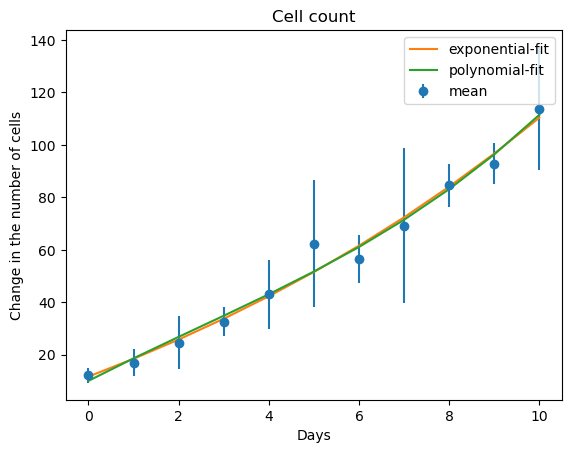

In [5]:
# Write your code here

<details>
<summary> Show suggested solution </summary>

```Python
import csv
import numpy
import pathlib
import matplotlib.pyplot
import scipy.optimize

def process_csv(csv_file, dishes):
    with open(csv_file, "r") as csv_file_handle:
        _, day, _ , dish_number = str(csv_file.stem).split("_")
        day = int(day)
        dish_number = int(dish_number)
        cell_counter = 0
        cell_area_counter = 0
        reader = csv.DictReader(csv_file_handle)
        for row in reader:
            cell_counter += 1
            cell_area_counter += int(row[" Cell Area"])
        if dish_number not in dishes.keys():
            dishes[dish_number] = {}
        dishes[dish_number][day] = {
            "cell_count": cell_counter,
            "area": cell_area_counter
        } 
    return

csv_files = list()
data_folder = pathlib.Path("./data")
for csv_file in data_folder.iterdir():
    if "dish_" in csv_file.stem:
        csv_files.append(csv_file)


dishes = {}
for csv_file in csv_files:
    process_csv(csv_file, dishes)

area = []
count = []
cells = {"area": area, "count": count}
# We know that the dishes are numbered so we iterate over them<
for dish_number in range(1, len(dishes) + 1, 1):
    dish = dishes[dish_number]
    dish_area = []
    dish_count = []
    # We know that the days in the dishes are numbered
    for day_number in range(1, len(dish) + 1, 1):
        value_pair = dish[day_number]
        day_area = value_pair["area"]
        day_count = value_pair["cell_count"]
        dish_area.append(day_area)
        dish_count.append(day_count)
    area.append(dish_area)
    count.append(dish_count)

def get_forward_derivative(series_x, series_y):
    """ Gets the forward derivative

    We chose the forward derivative, because it needs fewer values and still gives us some insight.
    We can also calculate it for the first element in the series, which lacks a predecessor
    """
    if len(series_x) != len(series_y):
        raise ValueError(f"{series_x} did not have the same number of elements as {series_y}")
    return_x = list()
    return_y = list()
    # Remeber that the last element has no sucessor and we can therefore not get a derivative for it
    for index in range(0, len(series_x) - 1, 1):
        delta_x = series_x[index + 1] - series_x[index]
        delta_y = series_y[index + 1] - series_y[index]
        slope = delta_y / delta_x
        return_x.append(series_x[index])
        return_y.append(slope)
    return return_x, return_y
    

days = [day for day in range(0, len(cells["count"][0]))]
days_derived = days[0:-1]
growth_number_of_cells = [list() for day in days]
growth_area = [list() for day in days]

for dish in range(0, len(cells["count"])):
    current_growth_number_of_cells = get_forward_derivative(days, cells["count"][dish])[1]
    current_growth_area = get_forward_derivative(days, cells["area"][dish])[1]
    for day in range(0, len(days_derived)):
        growth_number_of_cells[day].append(current_growth_number_of_cells[day])
        growth_area[day].append(current_growth_area[day])
        
growth_number_of_cells_mean = list()
growth_number_of_cells_std = list()
growth_area_mean = list()
growth_area_std = list()
for day in range(0, len(days_derived)):
    current_values_count = growth_number_of_cells[day]
    growth_number_of_cells_mean.append(numpy.mean(current_values_count))
    growth_number_of_cells_std.append(numpy.std(current_values_count))
    current_values_area = growth_area[day]
    growth_area_mean.append(numpy.mean(current_values_area))
    growth_area_std.append(numpy.std(current_values_area))

def exponential(x, a, b, c):
    return a*numpy.exp(b*x) + c

def third_order_polynomial(x, a, b, c, d):
    return a + b * x + c * (x ** 2) + d *  (x ** 3)

exponential_optimized_parameters, exponential_parameters_covariance = scipy.optimize.curve_fit(exponential, days_derived, growth_number_of_cells_mean)
# Consult https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html Retruns for the covariance
exponential_std_parameters = numpy.sqrt(numpy.std(exponential_count_parameters_covariance))
print(f"Exponetial: {exponential_optimized_parameters[0]:f} * e ^ (x * {exponential_optimized_parameters[1]:f}) + {exponential_optimized_parameters[2]:f} std: {exponential_std_parameters:f}")
polynomial_optimized_parameters, polynomial_parameters_covariance = scipy.optimize.curve_fit(third_order_polynomial, days_derived, growth_number_of_cells_mean)
# Consult https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html Retruns for the covariance
polynomial_std_parameters = numpy.sqrt(numpy.std(polynomial_parameters_covariance))
print(f"Polynomial: {polynomial_optimized_parameters[0]:f} + {polynomial_optimized_parameters[1]:f} * x + {polynomial_optimized_parameters[2]:f} * (x^2) + {polynomial_optimized_parameters[3]:f} * (x^3) std: {polynomial_std_parameters:f}")

matplotlib.pyplot.errorbar(days_derived, growth_number_of_cells_mean, yerr=growth_number_of_cells_std, fmt="o", label = "mean")
matplotlib.pyplot.plot(days_derived, exponential(numpy.array(days_derived), *exponential_optimized_parameters), "-", label = "exponential-fit")
matplotlib.pyplot.plot(days_derived, third_order_polynomial(numpy.array(days_derived), *polynomial_optimized_parameters), "-", label = "polynomial-fit")
matplotlib.pyplot.title("Cell count")
matplotlib.pyplot.xlabel("Days")
matplotlib.pyplot.ylabel("Change in the number of cells")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
```

</details>

## Simulation

As you know, Alice and Bob are not real and neither are their data, so how did I generate the csv-files.  The answer to this is simulation. Especially in Physics simulations are often used tool to answer questions that cannot be answered with simple experiments. If we want to know how galaxies form we can neither make one in our own backyard nor can we observe it in our lifetimes, so we build a mathematical model in a computer and investigate it.

In biology, computer simulations are more difficult to perform, because we lack a sufficiently advanced mathematical understanding of the problems we investigate. Expressed in a simpler way “it is easier to calculate how two galaxies collide, than how two cell interacts with each other. You can see this on the way I simulated our cells.

I first created a big empty dish. Then I placed a cell in it and let its nucleus grow while growing a cell body around it. Whenever the nucleus split by accident, I considered this a normal cell division. If a cell lost most of its body or was too small, I considered it dead. If you find this simplification revolting, you have already understood why biology is not easy to simulate. There are a lot more nuances and rules to consider than in Physics.

I mention that simulations exist, because I believe that during your career you will may encounter questions that can be answered by writing a short program and running it instead of using a plant or animal and that the use of simulation will slowly proliferate within biology. For the latter case always remember that a simulation is a simplified mathematical model and therefore flawed, so if you use it always ask which corners were cut and how this will influence your research.

The code I used to create the csv-files can be found in ```cell_simulation.py```. 

# Rework t

After the philosophical part let us get an example so we know what we are talking about. 

Our group focuses how oxytocin, a neurohormone synthesized in the hypothalamus, influences maternal care. A major feature of mammalian maternal care is milk supply through the mammary gland. You may have already heard that oxytocin is secreted into the blood stream in the pituitary gland following suckling of the offspring. It elicits milk ejections by evoking contractions of smooth muscle cells in the mammary ducts.

Interestingly, oxytocin is not continuously secreted during suckling but released in bursts. This burst-like secretion is caused by bursts of oxytocin neural activity. We try to understand how this activity is generated, by investigating the behavior of rats and activity in their brains.

The example we picked for you is the analysis of such neural activity with behavioral data. You will work with our experimental data. This data consists of extracellular spike (neuroscientists call action potential "spikes") recordings in which many cells have been recorded simultaneously, as well as pre-analyzed video-based behavioral data. We analyzed the movement of the dam, because the animal stops moving before milk ejection. 

Only one of the cells recorded is a potential oxytocin neuron. The final goal of the course will be to find this oxytocin neuron by identifying the characteristic firing pattern shown in the following image.

![Sketch of the experiment and resulting plot](img/experiment.jpg)

A. Recording setup with an electrode that has many contacts along one [single shank](https://en.wikipedia.org/wiki/Neuropixels).
B. Top: Maternal behavior (immobility vs. mobility). Bottom: Neural activity. Note that we see the spikes per second (Hz). We also see that there are seven distinct bursts measuring around 100 spikes per second. Also, note that the burst pattern seen here has been described to coincide with immobility. The combined investigation of both neural activity and behavior thus provides converging evidence that the recorded neuron is an oxytocin neuron.

![The action potential of a Oxytocin cell showing a burst with multiple spikes](img/OTburst.png)

An example of an oxytocin burst consisting of multiple spikes. You can see a large number of spikes in the center of the image.